# LAB 7

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn import metrics

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/housing/"

In [5]:
data = pd.read_csv("US_Accidents_Dec21_updated.csv")

In [6]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


All attributes are numerical, except the ocean_proximity field.

In [8]:
#This method shows a statistical summary of the numerical attributes 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,2845342.0,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,2845342.0,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,4.900058e+01
Start_Lng,2845342.0,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-6.711317e+01
End_Lat,2845342.0,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,4.907500e+01
End_Lng,2845342.0,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-6.710924e+01
Distance(mi),2845342.0,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,1.551860e+02
Number,1101431.0,8089.408114,18360.093995,0.000000,1270.000000,4007.000000,9567.000000,9.999997e+06
Temperature(F),2776068.0,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,1.960000e+02
Wind_Chill(F),2375699.0,59.658231,21.160967,-89.000000,46.000000,63.000000,76.000000,1.960000e+02
Humidity(%),2772250.0,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,1.000000e+02


In [26]:
#Use top 4 features for each of the Classes (8 total features) drop the rest
#1-WindChill, Humidity, Temperature, Visibility
#2-WindChill, WindSpeed, Humidity, Distance
#3-WindChill, WindSpeed, Distance(mi), Pressure(Air)
#4-Distance, Temperature, Wind_Chill(F), Humidity
df2 = data.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
df2

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,3,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,2,NaN,36.9,91.0,NaN,0.747,29.68,10.0,91.0
2,2,NaN,36.0,97.0,NaN,0.055,29.70,10.0,97.0
3,2,NaN,39.0,55.0,NaN,0.123,29.65,10.0,55.0
4,3,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
...,...,...,...,...,...,...,...,...,...
2845337,2,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2845338,2,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2845339,2,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2845340,2,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [44]:
nosev = data.filter(['Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
nosev

,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,NaN,36.9,91.0,NaN,0.747,29.68,10.0,91.0
2,NaN,36.0,97.0,NaN,0.055,29.70,10.0,97.0
3,NaN,39.0,55.0,NaN,0.123,29.65,10.0,55.0
4,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
...,...,...,...,...,...,...,...,...
2845337,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2845338,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2845339,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2845340,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [45]:
df2 = df2.dropna()
df2 = df2.reset_index(drop = True)
df2

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,3,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,3,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
2,2,29.2,35.6,100.0,8.1,1.427,29.66,10.0,100.0
3,2,30.0,33.1,92.0,3.5,0.521,29.63,0.5,92.0
4,2,31.8,39.0,70.0,11.5,0.491,29.59,10.0,70.0
...,...,...,...,...,...,...,...,...,...
2363634,2,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2363635,2,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2363636,2,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2363637,2,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [46]:
nosev = nosev.dropna()
nosev = nosev.reset_index(drop = True)
nosev

,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
2,29.2,35.6,100.0,8.1,1.427,29.66,10.0,100.0
3,30.0,33.1,92.0,3.5,0.521,29.63,0.5,92.0
4,31.8,39.0,70.0,11.5,0.491,29.59,10.0,70.0
...,...,...,...,...,...,...,...,...
2363634,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2363635,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2363636,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2363637,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [35]:
#Correlations for dataframe2
corr_matrix = df2.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix["Severity"].sort_values(ascending=False)

Severity           1.000000
Distance(mi)       0.074843
Wind_Speed(mph)    0.037440
Humidity(%)        0.037375
Humidity(%)        0.037375
Visibility(mi)    -0.006102
Pressure(in)      -0.011482
Temperature(F)    -0.089517
Wind_Chill(F)     -0.097101
Name: Severity, dtype: float64

In [111]:
#normalize data
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(nosev)
X

array([[0.37294118, 0.3279476 , 0.57575758, ..., 0.30915126, 0.07142857,
        0.57575758],
       [0.34823529, 0.30567686, 0.92929293, ..., 0.3074917 , 0.07142857,
        0.92929293],
       [0.34588235, 0.29956332, 1.        , ..., 0.30678046, 0.07142857,
        1.        ],
       ...,
       [0.51764706, 0.4628821 , 0.63636364, ..., 0.3086771 , 0.07142857,
        0.63636364],
       [0.50980392, 0.45414847, 0.80808081, ..., 0.30583215, 0.07142857,
        0.80808081],
       [0.54117647, 0.48908297, 0.46464646, ..., 0.28236131, 0.05      ,
        0.46464646]])

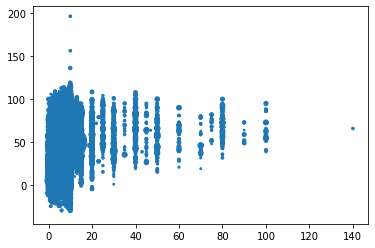

In [109]:
plt.scatter(nosev['Visibility(mi)'], nosev['Temperature(F)'])

In [113]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [49]:
targets = df2.Severity - 1
targets

0          2
1          2
2          1
3          1
4          1
          ..
2363634    1
2363635    1
2363636    1
2363637    1
2363638    1
Name: Severity, Length: 2363639, dtype: int64

In [114]:
estimations = kmeans.labels_
estimations

array([3, 1, 1, ..., 3, 1, 0])

In [115]:
centroids = kmeans.cluster_centers_
centroids

array([[0.48550463, 0.43166789, 0.48379104, 0.00752631, 0.00427792,
        0.3019515 , 0.07078466, 0.48379104],
       [0.4293147 , 0.37235041, 0.89019572, 0.00539686, 0.00498266,
        0.30127958, 0.05358477, 0.89019572],
       [0.5197646 , 0.46658404, 0.24320996, 0.00754597, 0.00422689,
        0.28696085, 0.07088333, 0.24320996],
       [0.4632598 , 0.40843534, 0.68633388, 0.00679169, 0.00430452,
        0.3043778 , 0.06912387, 0.68633388]])

In [116]:
y_kmeans = kmeans.fit_predict(X)

In [117]:
y_kmeans

array([3, 1, 1, ..., 3, 1, 0])

# Cross Tabulation

In [118]:
pd.crosstab(targets+1,y_kmeans+1)

col_0,1,2,3,4
Severity,,,,
1,5863,5165,9431,5080
2,532027,710834,299581,637274
3,21765,25786,10787,22598
4,17940,29723,7685,22100


# Graph

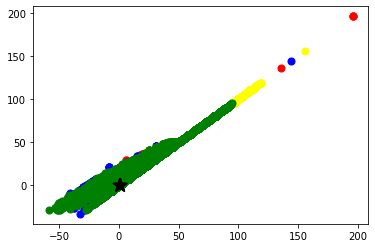

In [119]:
plt.scatter(nosev.iloc[y_kmeans == 0,0], nosev.iloc[y_kmeans == 0,1], s=50, color='red')
plt.scatter(nosev.iloc[y_kmeans == 1,0], nosev.iloc[y_kmeans == 1,1], s=50, color='blue')
plt.scatter(nosev.iloc[y_kmeans == 2,0], nosev.iloc[y_kmeans == 2,1], s=50, color='yellow')
plt.scatter(nosev.iloc[y_kmeans == 3,0], nosev.iloc[y_kmeans == 3,1], s=50, color='green')
plt.scatter(centroids[0][0], centroids[0][1], marker='*', s=200, color='black')
plt.scatter(centroids[1][0], centroids[1][1], marker='*', s=200, color='black')
plt.scatter(centroids[2][0], centroids[2][1], marker='*', s=200, color='black')
plt.scatter(centroids[3][0], centroids[3][1], marker='*', s=200, color='black')

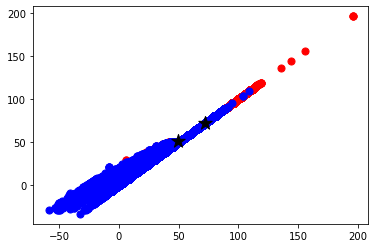

In [110]:
plt.scatter(nosev.iloc[y_kmeans == 0,0], nosev.iloc[y_kmeans == 0,1], s=50, color='red')
plt.scatter(nosev.iloc[y_kmeans == 1,0], nosev.iloc[y_kmeans == 1,1], s=50, color='blue')
plt.scatter(centroids[0][0], centroids[0][1], marker='*', s=200, color='black')
plt.scatter(centroids[1][0], centroids[1][1], marker='*', s=200, color='black')

# Decision Boundaries

# (Optional) Optimal Amount of Clusters

# Elbow Method

In [121]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(nosev)
    distortions.append(kmeanModel.inertia_)

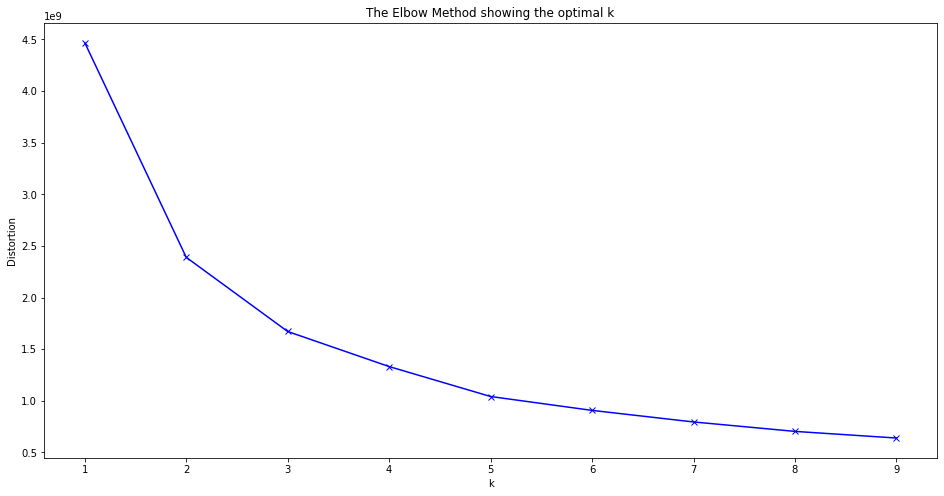

In [122]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [126]:
from sklearn import datasets
from sklearn.metrics import silhouette_score
# Calculate Silhoutte Score
#
score = silhouette_score(nosev, estimations, metric='euclidean')
#
# Print the score
#
print('Silhouette Score: %.3f' % score)

KeyboardInterrupt: 